In [51]:
# put percent of of total by party by year in timeseries to see if republicans get more or less % by year

# how all leagues donate by year, how speficic leagues donate by year time series all in one graph

# how does the location of the team affect the donation patterns

# do owners that own multiple teams donate differently than owners in that only have one team  
# in terms of size or amount but also in who the who they donate to.

In [52]:
# I'm not 100% on what types of graphs we should use for everythig but this is what ove come up with for now 

# Austin: Intro/Explnation of Data Set and where it came from blah blah,
# limitations things of that nature, Graph total amount of money given total, and each year.

# Presenter 2: Graph of percentage of total donation given to each party by year in time series probably line graph.
# how leagues donate by year percentage wise, how speficic leagues donate by year time series all in one graph

# Presenter 3: How does geographic location effect donations to owners in similar areas donate in similar ways 
# or do they donate along the same lines as the rest of thier league 

# More to explore: If we can get a data set and have time we can see if owners tend to donate along the same voting 
# patterns as the areas they are in or not.

# Do owners that have one team donate one way vs owners of multiple teams, does this effect how much they donate and which way they donate
# can do this by year.


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sports= "SPD.csv"
sport= 'SPD(League only).csv'

df = pd.read_csv(sports,index_col=0, parse_dates=True)
dfd = pd.read_csv(sport)


dfd

,Owner,Team,League,Recipient,Amount,Election Year,Party,City,State
0,Adam Silver,Commissioner,NBA,WRIGHT 2016,4000,2016,Democrat,New York,New York
1,Adam Silver,Commissioner,NBA,BIDEN FOR PRESIDENT,2800,2020,Democrat,New York,New York
2,Adam Silver,Commissioner,NBA,CORY 2020,2700,2020,Democrat,New York,New York
3,Adam Silver,Commissioner,NBA,Kamala Harris for the People,2700,2020,Democrat,New York,New York
4,Adam Silver,Commissioner,NBA,Win The Era PAC,2700,2020,Democrat,New York,New York
...,...,...,...,...,...,...,...,...,...
3275,Ted Leonsis,Washington Mystics,WNBA,DAS FOR CONGRESS,2600,2018,Democrat,Washington,D.C.
3276,Ted Leonsis,Washington Mystics,WNBA,ALEX T FOR CONGRESS,2400,2018,Democrat,Washington,D.C.
3277,Ted Leonsis,Washington Mystics,WNBA,THE NIKI TSONGAS COMMITTEE,2000,2016,Democrat,Washington,D.C.
3278,Ted Leonsis,Washington Mystics,WNBA,FRIENDS OF JOHN SARBANES,2000,2018,Democrat,Washington,D.C.


In [54]:
dfd['League'].str.strip()
df['League'].str.strip()

Owner
Adam Silver    NBA
Adam Silver    NBA
Adam Silver    NBA
Adam Silver    NBA
Adam Silver    NBA
              ... 
Zygi Wilf      NFL
Zygi Wilf      NFL
Zygi Wilf      NFL
Zygi Wilf      NFL
Zygi Wilf      NFL
Name: League, Length: 2798, dtype: object

In [55]:
dfd["Election Year"]= dfd["Election Year"].astype(object)
df.head(20)
dfd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3280 entries, 0 to 3279
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Owner          3280 non-null   object
 1   Team           3280 non-null   object
 2   League         3280 non-null   object
 3   Recipient      3280 non-null   object
 4   Amount         3280 non-null   int64 
 5   Election Year  3280 non-null   object
 6   Party          3266 non-null   object
 7   City           3280 non-null   object
 8   State          3280 non-null   object
dtypes: int64(1), object(8)
memory usage: 230.8+ KB


In [56]:
df["Amount"].sum()
dfyr= df.groupby(['Election Year'],as_index=False)['Amount'].sum()
dfyr

,Election Year,Amount
0,2016,17679696.0
1,2018,16932768.0
2,2020,12366233.0


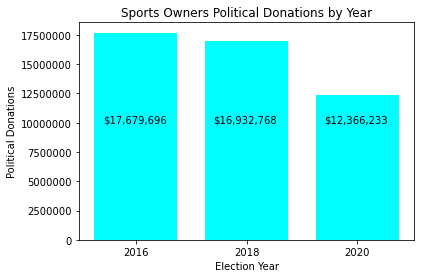

In [57]:
x = dfyr ['Election Year']
plt.bar(dfyr['Election Year'],dfyr['Amount'],color ="cyan", width=1.5)
plt.ticklabel_format(axis="y",style='plain')
plt.xticks(np.arange(min(x),max(x)+1, 2.0))
plt.xlabel('Election Year')
plt.ylabel('Political Donations')
plt.title('Sports Owners Political Donations by Year')
bbox = dict(boxstyle ="round", fc ="purple")
plt.annotate("$17,679,696",xy=(2016,17500000),xytext=(2015.4,10000000))
plt.annotate("$16,932,768",xy=(2018,16932768),xytext=(2017.4,10000000))
plt.annotate("$12,366,233",xy=(2016,12366233),xytext=(2019.4,10000000))
plt.show()

In [58]:
dfmlb2= dfd.loc[dfd["League"]=="MLB"]
dfmlb= dfmlb2.groupby(['Election Year'], as_index = False)['Amount'].sum()
dfmlb
dfnba2= dfd.loc[dfd["League"]=="NBA"]
dfnba= dfnba2.groupby(['Election Year'], as_index = False)['Amount'].sum()
dfnba
dfnfl2= dfd.loc[dfd["League"]=="NFL"]
dfnfl= dfnfl2.groupby(['Election Year'], as_index = False)['Amount'].sum()
dfnfl
dfwnba2= dfd.loc[dfd["League"]=="WNBA"]
dfwnba= dfwnba2.groupby(['Election Year'], as_index = False)['Amount'].sum()
dfwnba
dfnhl2= dfd.loc[dfd["League"]=="NHL"]
dfnhl= dfnhl2.groupby(['Election Year'], as_index = False)['Amount'].sum()
dfnhl
dfnas2= dfd.loc[dfd["League"]=="NASCAR"]
dfnas= dfnas2.groupby(['Election Year'], as_index = False)['Amount'].sum()
dfnas2

,Owner,Team,League,Recipient,Amount,Election Year,Party,City,State
22,Andrew Murstein,Richard Petty Motorsports,NASCAR,Right to Rise USA,1000,2016,Republican,Statesville,North Carolina
23,Andrew Murstein,Richard Petty Motorsports,NASCAR,Hillary Victory Fund,1000,2016,Democrat,Statesville,North Carolina
370,Chip Ganassi,Chip Ganassi Racing,NASCAR,Republican Federal Committee of Pennsylvania,5000,2016,Republican,Concord,North Carolina
371,Chip Ganassi,Chip Ganassi Racing,NASCAR,Republican Federal Committee of Pennsylvania,5000,2020,Republican,Concord,North Carolina
372,Chip Ganassi,Chip Ganassi Racing,NASCAR,Republican National Committee,1300,2020,Republican,Concord,North Carolina
...,...,...,...,...,...,...,...,...,...
2021,Roger Penske,Team Penske,NASCAR,Brenda Lawrence for Congress,2433,2016,Democrat,Mooresville,North Carolina
2022,Roger Penske,Team Penske,NASCAR,Brenda Lawrence for Congress,2000,2020,Democrat,Mooresville,North Carolina
2023,Roger Penske,Team Penske,NASCAR,Caruso-Cabrera for New York,2000,2020,Democrat,Mooresville,North Carolina
2294,Troy Stafford,Premium Motorsports,NASCAR,THE RICHARD BURR COMMITTEE,250,2016,Republican,Mooresville,North Carolina


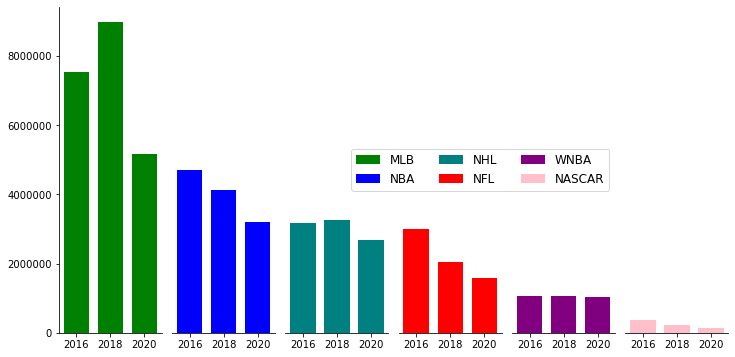

In [59]:
x = dfyr ['Election Year']
fig, ax = plt.subplots(1,6,sharex=True, sharey=True,figsize=(12,6))
lo=ax[0].bar(dfmlb['Election Year'],dfmlb['Amount'],color ="green", width=1.5)
ll=ax[1].bar(dfnba['Election Year'],dfnba['Amount'],color ='blue', width=1.5)
a=ax[3].bar(dfnfl['Election Year'],dfnfl['Amount'],color ='red', width=1.5)
l=ax[2].bar(dfnhl['Election Year'],dfnhl['Amount'],color ='teal', width=1.5)
h=ax[4].bar(dfwnba['Election Year'],dfwnba['Amount'],color ='purple', width=1.5)
hh=ax[5].bar(dfnas['Election Year'],dfnas['Amount'],color ='pink', width=1.5)
ax[0].ticklabel_format(axis="y",style='plain')
plt.subplots_adjust(wspace=.1)
ax[0].ticklabel_format(axis="x",style='plain')

ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].spines['top'].set_visible(False)
ax[3].spines['right'].set_visible(False)
ax[3].spines['top'].set_visible(False)
ax[4].spines['right'].set_visible(False)
ax[4].spines['top'].set_visible(False)
ax[5].spines['right'].set_visible(False)
ax[5].spines['top'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[2].spines['left'].set_visible(False)
ax[3].spines['left'].set_visible(False)
ax[4].spines['left'].set_visible(False)
ax[5].spines['left'].set_visible(False)
ax[1].tick_params(left = False)
ax[2].tick_params(left = False)
ax[3].tick_params(left = False)
ax[4].tick_params(left = False)
ax[5].tick_params(left = False)
plt.xticks(np.arange(min(x),max(x)+1, 2.0))
ax[4].legend((lo, ll, l, a, h, hh),
           ('MLB', 'NBA', 'NHL', 'NFL', 'WNBA', 'NASCAR'),
           scatterpoints=1,
           loc='center right',
           ncol=3,
           fontsize=12)
plt.show
plt.sca(ax[0])
# Put percentage change by year in each subsequent bar
# above each bar put the percent of all donation for the year
# find out how to change annotation text colors
#add league to the bars remove x label and add legend for colors
#3 graphs leagues color coded 

In [60]:
dfsc=dfd.groupby(["Team",'League'],as_index=False)['Amount'].count()
dfsc2=dfd.groupby(["Team",'League'],as_index=False)['Amount'].sum()
dfsc2=dfsc2.sort_values(by=['League','Team'])
dfsc=dfsc.sort_values(by=['League','Team'])
dfd=dfd.sort_values(by=['League','Team'])
dfsc2

,Team,League,Amount
3,Arizona Diamondbacks,MLB,1379700
7,Baltimore Orioles,MLB,2092772
11,Boston Red Sox,MLB,143650
19,Chicago Cubs,MLB,1890359
21,Chicago White Sox,MLB,1797300
...,...,...,...
66,Los Angeles Sparks,WNBA,314900
72,Minnesota Lynx,WNBA,119100
96,Phoenix Mercury,WNBA,155800
114,Seattle Storm,WNBA,78120


In [61]:
x = dfd.groupby(["Team", "League"],as_index=False)["Amount"].count()
x = x.rename(columns={"Amount":"Count"})


x2 = x[x['Team'] != 'San Francisco Giants']
x2

,Team,League,Count
0,Anaheim Ducks,NHL,11
1,Arizona Cardinals,NFL,31
2,Arizona Coyotes,NHL,3
3,Arizona Diamondbacks,MLB,86
4,Atlanta Dream,WNBA,44
...,...,...,...
126,Washington Capitals,NHL,15
127,Washington Football Team,NFL,7
128,Washington Mystics,WNBA,15
129,Washington Nationals,MLB,9


In [62]:
colors = []
for i in x["League"]:
    if i == "MLB" or i== "MLB ":
        colors.append("blue")
    elif i == "NBA" or i== "NBA ":
        colors.append("red")
    elif i == "NFL" or i== "NFL ":
        colors.append("green")
    elif i == "NHL" or i== "NHL ":
        colors.append("yellow")
    elif i == "NASCAR" or i== "NASCAR ":
        colors.append("pink")
    elif i == "WNBA" or i== "WNBA ":
        colors.append("purple")
    else:
        print(i)
print(colors)
print(len(colors))

['yellow', 'green', 'yellow', 'blue', 'purple', 'green', 'red', 'blue', 'green', 'yellow', 'red', 'blue', 'green', 'yellow', 'yellow', 'green', 'green', 'yellow', 'red', 'blue', 'purple', 'blue', 'pink', 'green', 'blue', 'green', 'red', 'blue', 'yellow', 'blue', 'yellow', 'blue', 'red', 'green', 'yellow', 'purple', 'green', 'purple', 'green', 'red', 'green', 'red', 'yellow', 'blue', 'yellow', 'red', 'green', 'pink', 'blue', 'red', 'green', 'purple', 'red', 'green', 'pink', 'green', 'blue', 'red', 'purple', 'green', 'blue', 'green', 'blue', 'yellow', 'red', 'green', 'purple', 'green', 'red', 'blue', 'blue', 'red', 'purple', 'red', 'blue', 'green', 'yellow', 'yellow', 'green', 'yellow', 'red', 'green', 'green', 'yellow', 'green', 'red', 'blue', 'yellow', 'blue', 'blue', 'red', 'red', 'red', 'green', 'yellow', 'blue', 'purple', 'red', 'yellow', 'blue', 'green', 'red', 'pink', 'pink', 'pink', 'pink', 'red', 'yellow', 'blue', 'green', 'blue', 'yellow', 'blue', 'green', 'purple', 'pink', 'bl

In [63]:
colors = []
for i in x2["League"]:
    if i == "MLB" or i== "MLB ":
        colors.append("blue")
    elif i == "NBA" or i== "NBA ":
        colors.append("red")
    elif i == "NFL" or i== "NFL ":
        colors.append("green")
    elif i == "NHL" or i== "NHL ":
        colors.append("yellow")
    elif i == "NASCAR" or i== "NASCAR ":
        colors.append("pink")
    elif i == "WNBA" or i== "WNBA ":
        colors.append("purple")
    else:
        print(i)
print(colors)
print(len(colors))

['yellow', 'green', 'yellow', 'blue', 'purple', 'green', 'red', 'blue', 'green', 'yellow', 'red', 'blue', 'green', 'yellow', 'yellow', 'green', 'green', 'yellow', 'red', 'blue', 'purple', 'blue', 'pink', 'green', 'blue', 'green', 'red', 'blue', 'yellow', 'blue', 'yellow', 'blue', 'red', 'green', 'yellow', 'purple', 'green', 'purple', 'green', 'red', 'green', 'red', 'yellow', 'blue', 'yellow', 'red', 'green', 'pink', 'blue', 'red', 'green', 'purple', 'red', 'green', 'pink', 'green', 'blue', 'red', 'purple', 'green', 'blue', 'green', 'blue', 'yellow', 'red', 'green', 'purple', 'green', 'red', 'blue', 'blue', 'red', 'purple', 'red', 'blue', 'green', 'yellow', 'yellow', 'green', 'yellow', 'red', 'green', 'green', 'yellow', 'green', 'red', 'blue', 'yellow', 'blue', 'blue', 'red', 'red', 'red', 'green', 'yellow', 'blue', 'purple', 'red', 'yellow', 'blue', 'green', 'red', 'pink', 'pink', 'pink', 'pink', 'red', 'yellow', 'blue', 'green', 'yellow', 'blue', 'green', 'purple', 'pink', 'blue', 'pi

In [64]:
x2["colors"] = colors
x2

<ipython-input-64-2b33b1da039f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x2["colors"] = colors


,Team,League,Count,colors
0,Anaheim Ducks,NHL,11,yellow
1,Arizona Cardinals,NFL,31,green
2,Arizona Coyotes,NHL,3,yellow
3,Arizona Diamondbacks,MLB,86,blue
4,Atlanta Dream,WNBA,44,purple
...,...,...,...,...
126,Washington Capitals,NHL,15,yellow
127,Washington Football Team,NFL,7,green
128,Washington Mystics,WNBA,15,purple
129,Washington Nationals,MLB,9,blue


In [65]:
y=dfd.groupby(["Team", "League"],as_index=True)["Amount"].sum().reset_index()
y = pd.DataFrame(y)
y
y2= y[y['Team'] != 'San Francisco Giants']
y2

,Team,League,Amount
0,Anaheim Ducks,NHL,163100
1,Arizona Cardinals,NFL,148900
2,Arizona Coyotes,NHL,8300
3,Arizona Diamondbacks,MLB,1379700
4,Atlanta Dream,WNBA,922350
...,...,...,...
126,Washington Capitals,NHL,163513
127,Washington Football Team,NFL,131200
128,Washington Mystics,WNBA,163513
129,Washington Nationals,MLB,17500


In [66]:
we=dfd['League']
we

1298     MLB
1299     MLB
1300     MLB
1301     MLB
1302     MLB
        ... 
3275    WNBA
3276    WNBA
3277    WNBA
3278    WNBA
3279    WNBA
Name: League, Length: 3280, dtype: object

In [67]:
import matplotlib.patches as mpatches
fig =plt.figure()
plt.figure(figsize=(12, 6))
scatter = plt.scatter(x["Count"],y["Amount"], color= x["colors"])


blue = mpatches.Patch(color='blue', label='MLB')
red = mpatches.Patch(color='red', label='NBA')
green = mpatches.Patch(color='green', label='NFL')
yellow = mpatches.Patch(color='yellow', label='NHL')
pink = mpatches.Patch(color='pink', label='NASCAR')
purple = mpatches.Patch(color='purple', label='WNBA')
plt.legend(handles=[blue, red, green, yellow, pink, purple])
plt.ticklabel_format(axis="y",style='plain')

plt.show()

KeyError: 'colors'

<Figure size 432x288 with 0 Axes>

<Figure size 864x432 with 0 Axes>

In [ ]:
[["blue","MLB"], ["red","NBA"], ["green","NFL"], ["yellow","NHL"], ["pink","NASCAR"], ["purple","WNBA"] ]

In [ ]:
plt.figure(figsize=(12, 6))
scatter = plt.scatter(x2["Count"],y2["Amount"], color= x2["colors"])


blue = mpatches.Patch(color='blue', label='MLB')
red = mpatches.Patch(color='red', label='NBA')
green = mpatches.Patch(color='green', label='NFL')
yellow = mpatches.Patch(color='yellow', label='NHL')
pink = mpatches.Patch(color='pink', label='NASCAR')
purple = mpatches.Patch(color='purple', label='WNBA')
plt.legend(handles=[blue, red, green, yellow, pink, purple])
plt.ticklabel_format(axis="y",style='plain')

plt.show()